### Dependencies

In [ ]:
!pip install --user matplotlib numpy torch torchvision

### Imports

In [2]:
# Matplotlib
import matplotlib.pyplot as pp

# Numpy
import numpy

# Pytorch
import torch

# Neural networks
from torch import nn

# Functional
import torch.nn.functional as F

# Optimizer
from torch import optim

# Datasets and transforms
from torchvision import datasets, transforms

### Cuda

In [3]:
# Check if cuda is available
try:
    print(torch.cuda.get_device_name(torch.cuda.current_device()))
except:
    print('Cpu')

GeForce MX150


### Plot

In [4]:
# Plot samples
def plot(ax, images, cmap='gray', axis=False):
    count = 0
    
    for row in range(ax.shape[0]):
        for col in range(ax.shape[1]):
            ax[row, col].imshow(images[count].numpy().squeeze(), cmap=cmap)
            
            if not axis:
                ax[row, col].axis('off')
            
            count += 1

# Plot classify
def view_classify(img, ps):
    fig, (ax1, ax2) = pp.subplots(ncols=2, figsize=(6, 9))
    
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray')

    ax1.axis('off')
    
    ax2.barh(numpy.arange(10), ps.data.numpy().squeeze())

    ax2.set_aspect(0.1)

    ax2.set_yticks(numpy.arange(10))

    ax2.set_yticklabels(numpy.arange(10))
                             
    ax2.set_title('Class Probability')

    ax2.set_xlim(0, 1.1)

### Preprocessing

In [5]:
# Convert data to tensor and normalize (center and scale to unit)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
train = datasets.MNIST(
    root='.',
    train=True,
    download=True,
    transform=transform
)

In [6]:
# Define epochs
train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=False)

In [7]:
# Get samples
dataiter = iter(train)

images, labels = dataiter.next()  # One epoch

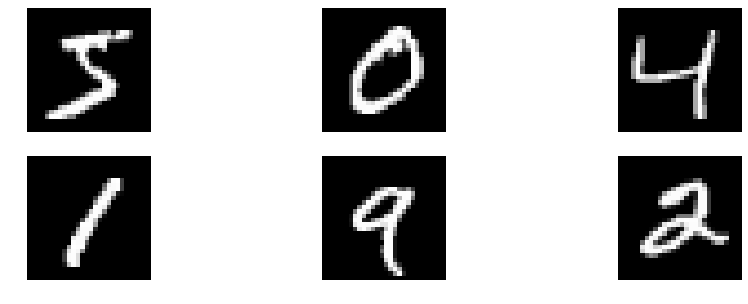

In [8]:
# Plot image
%matplotlib inline

fig, ax = pp.subplots(nrows=2, ncols=3, figsize=(15, 5))

plot(ax, images)

###  Artificial Neural Network

#### Manual

In [9]:
# Activation functions
def sigmoid(tensor):
    return 1 / (1 + torch.exp(-tensor))  # Exponential of euler by tensor

def softmax(tensor):
    return torch.exp(tensor) / torch.sum(torch.exp(tensor), dim=1).view(-1, 1)  # Horizontal sum (dim=0 vertical)

# Tensor processing
def flatten(tensor):
    return tensor.view(tensor.shape[0], -1)  # Specified number of lines and n columns 

In [10]:
# Flatten images
inputs = flatten(images)

# Weights and bias
w1 = torch.randn(784, 256)  # 784 lines and 256 columns (2D)

b1 = torch.randn(256)  # 1 Line and 256 columns (1D)

w2 = torch.randn(256, 10)  # 256 lines and 10 columns (2D)

b2 = torch.randn(10)  # 1 Line and 10 columns (1D)

# Hidden layer (linear function)
h = sigmoid(torch.mm(inputs, w1) + b1)  # Tensor 64 lines and 256 columns

# Output layer (linear function)  # Tensor 64 lines and 10 columns (classes)
output = torch.mm(h, w2) + b2

# Probability distribution
probabilities = softmax(output)  # 64 Lines and 10 columns (classes)

print(probabilities.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


#### Pytorch Manual

In [11]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Hidden layer
        self.hidden = nn.Linear(784, 256)  # 784 Properties and 256 neurons
        
        # Output layer
        self.output = nn.Linear(256, 10)  # 256 Properties and 10 neurons
        
        # Activation functions
        self.sigmoid = nn.Sigmoid()
        
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, tensor):
        return self.softmax(  # Probability distribution
            self.output(  # Output layer
                self.sigmoid(
                    self.hidden(tensor)  # Hidden Layer
                )
            )
        )

In [12]:
model = Network()

model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

#### Pytorch Functional Linear (Sigmoid)

In [13]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Hidden layer
        self.hidden = nn.Linear(784, 256)
        
        # Output layer
        self.output = nn.Linear(256, 10)
    
    def forward(self, tensor):
        tensor = F.sigmoid(self.hidden(tensor))
        
        tensor = F.softmax(self.output(tensor), dim=1)
        
        return tensor

In [14]:
model = Network()

model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

#### Pytorch Functional Linear (Relu)

In [54]:
class Network(nn.Module):
    def __init__(self):        
        super().__init__()
        
        # Fully connected
        
        # Input layer
        self.fc1 = nn.Linear(784, 128)
        
        # Hidden layer
        self.fc2 = nn.Linear(128, 64)
        
        # Output layer
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, tensor):
        tensor = self.fc1(tensor)
        
        tensor = F.relu(tensor)
        
        tensor = self.fc2(tensor)
        
        tensor = F.relu(tensor)
        
        tensor = self.fc3(tensor)
        
        tensor = F.softmax(tensor, dim=1)
        
        return tensor             

In [55]:
model = Network()

model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [56]:
# Get bias and weights from tensors
print(model.fc1.bias)

print(model.fc1.weight)

Parameter containing:
tensor([-0.0186, -0.0207,  0.0261,  0.0334,  0.0207,  0.0181,  0.0333, -0.0134,
         0.0277,  0.0026, -0.0231, -0.0028,  0.0054, -0.0349,  0.0010, -0.0135,
        -0.0028, -0.0027, -0.0257, -0.0277,  0.0040,  0.0091, -0.0285, -0.0278,
        -0.0168,  0.0262,  0.0123, -0.0268,  0.0228,  0.0158, -0.0284, -0.0319,
         0.0043, -0.0008, -0.0329,  0.0324,  0.0331,  0.0354, -0.0034,  0.0040,
         0.0044,  0.0289, -0.0274,  0.0157, -0.0002, -0.0238,  0.0306,  0.0155,
         0.0250, -0.0202, -0.0261,  0.0026, -0.0259, -0.0199, -0.0321, -0.0117,
        -0.0201, -0.0338,  0.0296,  0.0149, -0.0199, -0.0123,  0.0010, -0.0325,
         0.0228, -0.0143,  0.0213,  0.0033, -0.0165,  0.0294, -0.0027, -0.0047,
         0.0167, -0.0293,  0.0320,  0.0225,  0.0176, -0.0169, -0.0342,  0.0180,
        -0.0100, -0.0333,  0.0247,  0.0331, -0.0333,  0.0012, -0.0300,  0.0301,
         0.0200,  0.0116, -0.0167, -0.0060,  0.0100,  0.0231,  0.0011,  0.0033,
        -0.0198, -

In [57]:
# Set bias and weights
model.fc1.bias.data.fill_(0)

model.fc1.weight.data.fill_(0)

# Set weights randomly
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0076,  0.0096,  0.0044,  ..., -0.0100,  0.0021, -0.0168],
        [ 0.0056, -0.0019,  0.0174,  ..., -0.0091, -0.0028,  0.0007],
        [-0.0078, -0.0103, -0.0099,  ..., -0.0132, -0.0041, -0.0113],
        ...,
        [ 0.0003, -0.0020,  0.0039,  ..., -0.0084, -0.0096,  0.0037],
        [-0.0025,  0.0076,  0.0123,  ...,  0.0102,  0.0049,  0.0002],
        [-0.0089, -0.0029, -0.0127,  ..., -0.0158, -0.0237, -0.0023]])

tensor([[0.0922, 0.1000, 0.0955, 0.1019, 0.1033, 0.1027, 0.1111, 0.1112, 0.0857,
         0.0963]], grad_fn=<SoftmaxBackward>)


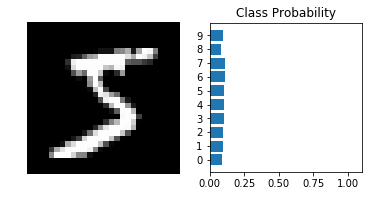

In [58]:
# Train
model.forward(images.view(images.shape[0], -1))

# Check predictions
%matplotlib inline

img = images[0].view(1, 784)

probabilities = model(img)

print(probabilities)

view_classify(img.view(1,28,28), probabilities)

#### Pytorch Sequential

In [73]:
# Hiper parameters
input_s = 784

hidden_s = [128, 64]

output_s = 10

epochs = 50

In [74]:
# Feed-forward network
model = nn.Sequential(
    nn.Linear(input_s, hidden_s[0]),
    nn.ReLU(),
    nn.Linear(hidden_s[0], hidden_s[1]),
    nn.ReLU(),
    nn.Linear(hidden_s[1], output_s),
    nn.LogSoftmax(dim=1)
)

model.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)>

In [76]:
# Train
criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.003)

count = 0

for epoch in range(epochs):
    running_loss = 0
    
    for images, labels in train:
        # Flatten
        images = images.view(images.shape[0], -1)
        
        # Reset grandient
        optimizer.zero_grad()
        
        # Output
        output = model(images)
        
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f'Train loss (epoch {count}): {running_loss / len(train)}')
        
        count += 1

Train loss (epoch 0): 1.3311638426361307
Train loss (epoch 1): 0.623001863008369
Train loss (epoch 2): 0.46077096424123115
Train loss (epoch 3): 0.39763268934828894
Train loss (epoch 4): 0.36362073855645366
Train loss (epoch 5): 0.3413173997087646
Train loss (epoch 6): 0.3248219078601296
Train loss (epoch 7): 0.3116948308149126
Train loss (epoch 8): 0.3007385249315167
Train loss (epoch 9): 0.2911283086770887
Train loss (epoch 10): 0.2824312318235572
Train loss (epoch 11): 0.27442242279013335
Train loss (epoch 12): 0.26711228702749523
Train loss (epoch 13): 0.2602340826856048
Train loss (epoch 14): 0.2536910924035857
Train loss (epoch 15): 0.24743142693059278
Train loss (epoch 16): 0.24140295261608513
Train loss (epoch 17): 0.23559855504124277
Train loss (epoch 18): 0.22999593246974417
Train loss (epoch 19): 0.22455296323878932
Train loss (epoch 20): 0.21929531889969606
Train loss (epoch 21): 0.21418617728914915
Train loss (epoch 22): 0.20921294541676033
Train loss (epoch 23): 0.2043588

tensor([[8.9821e-04, 1.7698e-05, 1.3816e-04, 5.4353e-04, 2.2951e-03, 9.7885e-01,
         1.6735e-02, 4.5665e-06, 4.7979e-04, 4.2009e-05]])


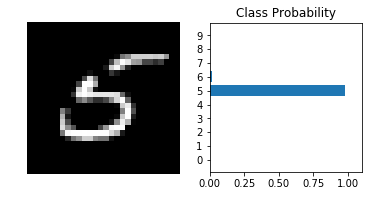

In [77]:
# Check predictions
%matplotlib inline

img = images[0].view(1, 784)

with torch.no_grad():
    log_probability_softmax = model(img)

log_probability_softmax = torch.exp(log_probability_softmax)

view_classify(img.view(1,28,28), log_probability_softmax)

print(log_probability_softmax)